In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predictive-healthcare-dataset/predictive_healthcare_dummy_dataset_50000.csv


# Analysis & Overview of Data 

In [2]:
print('====== DATASET INFORMATION ======')
df = pd.read_csv('/kaggle/input/predictive-healthcare-dataset/predictive_healthcare_dummy_dataset_50000.csv')

====== DATASET INFORMATION ======


* Age – Patient ki umar, chronic diseases ka risk age ke saath badhta hai (1 = Male, 0 = Female)

* Gender – Male/Female difference se kuch diseases ka risk vary karta hai.

* Systolic_BP – High value heart attack aur stroke ka strong indicator hoti hai.

* Diastolic_BP – Blood pressure ka resting pressure, hypertension assess karne me      use hota hai.

* BMI – Body fat measure karta hai, obesity-related diseases ka risk batata hai.

* Cholesterol – High cholesterol se artery blockage aur heart disease ka risk hota     hai.

* Glucose – Blood sugar level, diabetes aur pre-diabetes detect karne ke liye.

* Smoking – Smoking habits se heart, lung aur metabolic disease risk badhta hai.

* Alcohol – Excess alcohol liver, BP aur metabolic health ko affect karta hai.

* Physical_Activity – Weekly exercise level, low activity se disease risk increase    hota hai.

* Family_History – Genetic predisposition batata hai chronic diseases ke liye.

* Health_Risk (Label) – Overall lifestyle-based health risk (0 = Low, 1 = High).

In [3]:
print('===== FIRST FIVE ROW =====')
df.head()

===== FIRST FIVE ROW =====


,Age,Gender,Systolic_BP,Diastolic_BP,BMI,Cholesterol,Glucose,Smoking,Alcohol,Physical_Activity,Family_History,Health_Risk
0,56,1,145,97,19.0,269,167,0,1,2,0,1
1,69,0,113,98,22.6,178,116,0,0,5,0,0
2,46,1,109,77,30.4,183,99,0,1,2,1,0
3,32,0,123,62,26.9,200,146,1,0,3,0,0
4,60,1,104,77,25.8,229,82,0,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                50000 non-null  int64  
 1   Gender             50000 non-null  int64  
 2   Systolic_BP        50000 non-null  int64  
 3   Diastolic_BP       50000 non-null  int64  
 4   BMI                50000 non-null  float64
 5   Cholesterol        50000 non-null  int64  
 6   Glucose            50000 non-null  int64  
 7   Smoking            50000 non-null  int64  
 8   Alcohol            50000 non-null  int64  
 9   Physical_Activity  50000 non-null  int64  
 10  Family_History     50000 non-null  int64  
 11  Health_Risk        50000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 4.6 MB


In [5]:
print('===== GENDER VALUE COUNT =====')
print(df[['Gender']].value_counts())
print('===== HEALTH RISK VALUE COUNT =====')
print(df[['Health_Risk']].value_counts())

===== GENDER VALUE COUNT =====
Gender
1         25133
0         24867
Name: count, dtype: int64
===== HEALTH RISK VALUE COUNT =====
Health_Risk
0              30829
1              19171
Name: count, dtype: int64


In [6]:
print('===== MISSION VALUE =====')
df.isnull().sum()

===== MISSION VALUE =====


Age                  0
Gender               0
Systolic_BP          0
Diastolic_BP         0
BMI                  0
Cholesterol          0
Glucose              0
Smoking              0
Alcohol              0
Physical_Activity    0
Family_History       0
Health_Risk          0
dtype: int64

# EDA ( Exploratory Data Analysis )

In [7]:
# Required liberaries
import matplotlib.pyplot as plt
import seaborn as sns

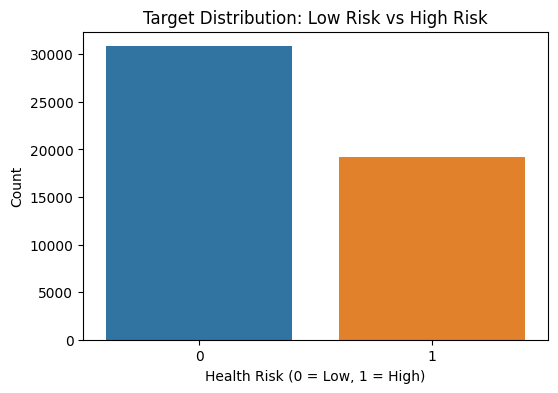

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Health_Risk', data=df)
plt.title("Target Distribution: Low Risk vs High Risk")
plt.xlabel("Health Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

In [9]:
df[['Age']].describe()

,Age
count,50000.000000
mean,48.538820
std,17.879704
min,18.000000
25%,33.000000
50%,48.000000
75%,64.000000
max,79.000000


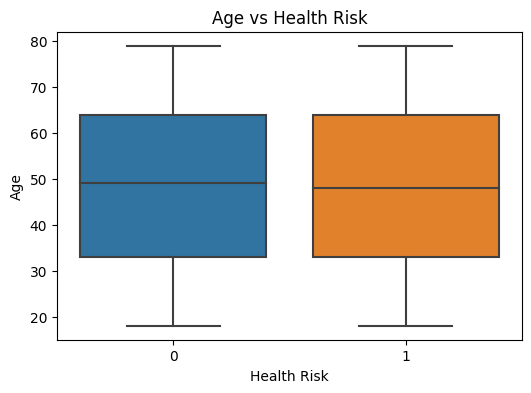

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Health_Risk', y='Age', data=df)
plt.title("Age vs Health Risk")
plt.xlabel("Health Risk")
plt.ylabel("Age")
plt.show()


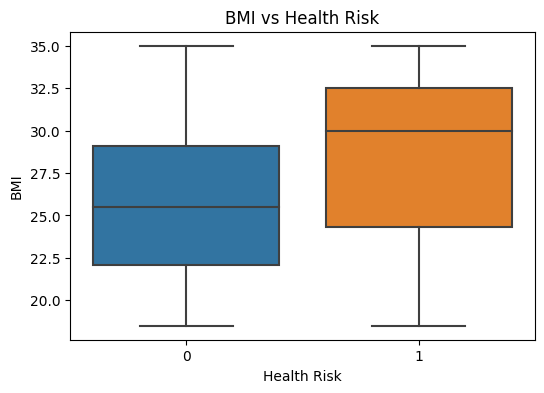

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Health_Risk', y='BMI', data=df)
plt.title("BMI vs Health Risk")
plt.xlabel("Health Risk")
plt.ylabel("BMI")
plt.show()


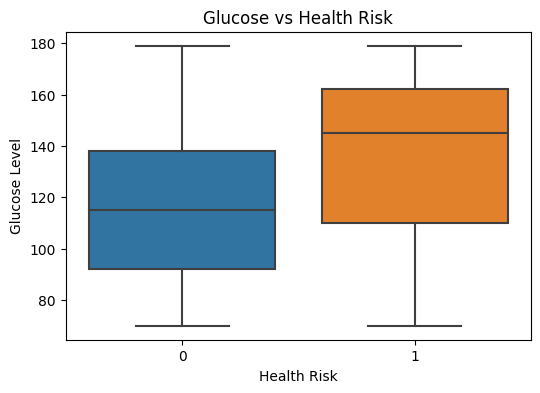

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Health_Risk', y='Glucose', data=df)
plt.title("Glucose vs Health Risk")
plt.xlabel("Health Risk")
plt.ylabel("Glucose Level")
plt.show()


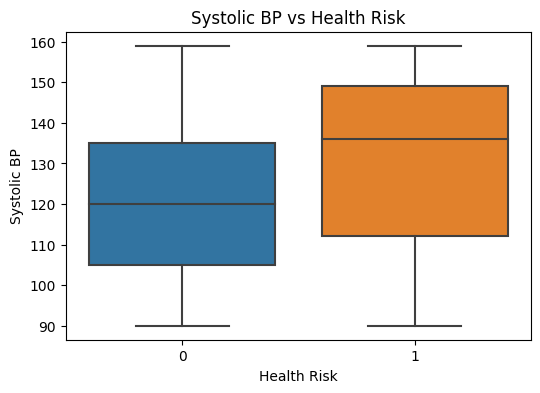

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Health_Risk', y='Systolic_BP', data=df)
plt.title("Systolic BP vs Health Risk")
plt.xlabel("Health Risk")
plt.ylabel("Systolic BP")
plt.show()


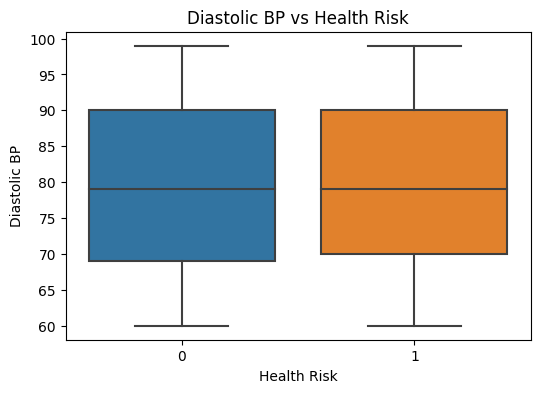

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Health_Risk', y='Diastolic_BP', data=df)
plt.title("Diastolic BP vs Health Risk")
plt.xlabel("Health Risk")
plt.ylabel("Diastolic BP")
plt.show()


===== CORRELATION HEATMAP =====

Shows the correlation between the which feature strongly correlate with which another feature



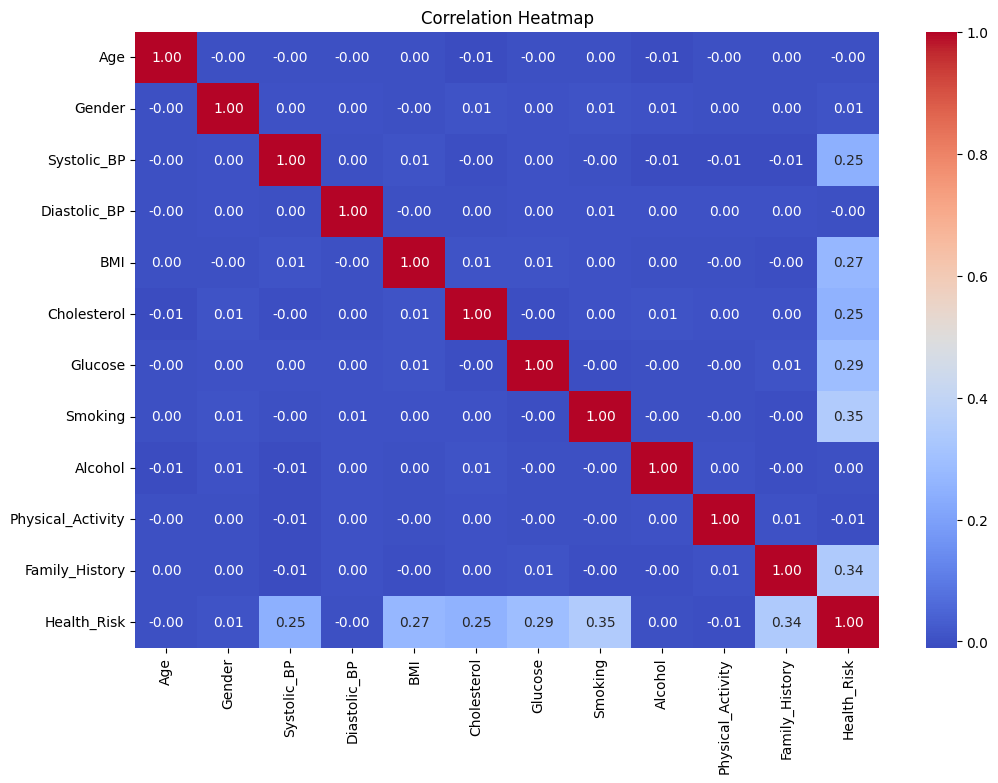

In [15]:
print('===== CORRELATION HEATMAP =====')
print()
print('Shows the correlation between the which feature strongly correlate with which another feature')
print()
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Correlation value:

### Near to 0→ no relation

### 0.2–0.4 → moderate positive relation

### > 0.5 → strong relation 

# Model Training

In [16]:
df.head(4)

,Age,Gender,Systolic_BP,Diastolic_BP,BMI,Cholesterol,Glucose,Smoking,Alcohol,Physical_Activity,Family_History,Health_Risk
0,56,1,145,97,19.0,269,167,0,1,2,0,1
1,69,0,113,98,22.6,178,116,0,0,5,0,0
2,46,1,109,77,30.4,183,99,0,1,2,1,0
3,32,0,123,62,26.9,200,146,1,0,3,0,0


In [17]:
x = df.drop('Health_Risk',axis=1)
y = df['Health_Risk']
print('Features')
print(x.head())
print()
print('Target Feature')
print(y.head())

Features
   Age  Gender  Systolic_BP  Diastolic_BP   BMI  Cholesterol  Glucose  \
0   56       1          145            97  19.0          269      167   
1   69       0          113            98  22.6          178      116   
2   46       1          109            77  30.4          183       99   
3   32       0          123            62  26.9          200      146   
4   60       1          104            77  25.8          229       82   

   Smoking  Alcohol  Physical_Activity  Family_History  
0        0        1                  2               0  
1        0        0                  5               0  
2        0        1                  2               1  
3        1        0                  3               0  
4        0        1                  1               1  

Target Feature
0    1
1    0
2    0
3    0
4    0
Name: Health_Risk, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (40000, 11)
x_test (10000, 11)
y_train (40000,)
y_test (10000,)


In [19]:
x_train.head()

,Age,Gender,Systolic_BP,Diastolic_BP,BMI,Cholesterol,Glucose,Smoking,Alcohol,Physical_Activity,Family_History
26531,65,1,90,79,19.1,219,75,0,1,0,0
19609,35,1,138,83,30.1,176,75,0,1,1,1
18905,21,0,152,60,22.8,276,166,1,0,0,1
45161,65,1,149,84,26.8,265,109,1,0,5,0
5117,36,0,108,95,34.0,174,160,0,0,5,0


In [20]:
y_train.head()

26531    0
19609    0
18905    1
45161    1
5117     0
Name: Health_Risk, dtype: int64

In [21]:
# # Important Algorithms
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [22]:
# ## Logistic Regression Training
# log_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
# log_model.fit(x_train, y_train)
# log_predictions = log_model.predict(x_test)

# print("--- Logistic Regression Evaluation ---")
# print("\nClassification Report:")
# print(classification_report(y_test, log_predictions))

# # Confusion Matrix
# cm_log = confusion_matrix(y_test, log_predictions)
# plt.figure(figsize=(5, 4))
# sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Predicted Low Risk (0)', 'Predicted High Risk (1)'],
#             yticklabels=['Actual Low Risk (0)', 'Actual High Risk (1)'])
# plt.title('Logistic Regression Confusion Matrix')
# plt.show()

# # Interpretation:
# print(f"\nLogistic Regression AUC-ROC: {roc_auc_score(y_test, log_model.predict_proba(x_test)[:, 1]):.4f}")

In [23]:
# ## Random Forest Training
# rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# rf_model.fit(x_train, y_train)
# rf_predictions = rf_model.predict(x_test)

# print("\n\n--- Random Forest Evaluation ---")
# print("\nClassification Report:")
# print(classification_report(y_test, rf_predictions))

# # Confusion Matrix
# cm_rf = confusion_matrix(y_test, rf_predictions)
# plt.figure(figsize=(5, 4))
# sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Predicted Low Risk (0)', 'Predicted High Risk (1)'],
#             yticklabels=['Actual Low Risk (0)', 'Actual High Risk (1)'])
# plt.title('Random Forest Confusion Matrix')
# plt.show()

# # Interpretation:
# print(f"\nRandom Forest AUC-ROC: {roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]):.4f}")

# Add some noice

In [24]:
import numpy as np

np.random.seed(42)

df_noisy = df.copy()

# Add Gaussian noise (small & realistic)
df_noisy["Systolic_BP"] += np.random.normal(0, 5, len(df))
df_noisy["Diastolic_BP"] += np.random.normal(0, 3, len(df))
df_noisy["BMI"] += np.random.normal(0, 0.8, len(df))
df_noisy["Glucose"] += np.random.normal(0, 8, len(df))
df_noisy["Cholesterol"] += np.random.normal(0, 10, len(df))

# Keep values in medical ranges
df_noisy["BMI"] = df_noisy["BMI"].clip(18.5, 40)
df_noisy["Systolic_BP"] = df_noisy["Systolic_BP"].clip(90, 180)
df_noisy["Diastolic_BP"] = df_noisy["Diastolic_BP"].clip(60, 120)


In [25]:
# Add label noise (simulate misclassification)
noise_rate = 0.07  # 7%

flip_idx = df_noisy.sample(frac=noise_rate, random_state=42).index
df_noisy.loc[flip_idx, "Health_Risk"] = 1 - df_noisy.loc[flip_idx, "Health_Risk"]


In [26]:
edge_cases = df_noisy[
    (df_noisy["BMI"] > 30) &
    (df_noisy["Glucose"] < 110) &
    (df_noisy["Systolic_BP"] < 130)
].sample(frac=0.2, random_state=42)

df_noisy.loc[edge_cases.index, "Health_Risk"] = 0


# Retraning

In [27]:
# from sklearn.model_selection import  GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier

In [28]:
# models = {
#     "Logistic Regression": {
#         "model": LogisticRegression(max_iter=1000),
#         "params": {
#             "C": [0.01, 0.1, 1, 10],
#             "solver": ["lbfgs"]
#         }
#     },

#     "Random Forest": {
#         "model": RandomForestClassifier(random_state=42),
#         "params": {
#             "n_estimators": [100, 200],
#             "max_depth": [10, 15, None],
#             "min_samples_split": [2, 5]
#         }
#     },

#     "Gradient Boosting": {
#         "model": GradientBoostingClassifier(),
#         "params": {
#             "n_estimators": [100, 200],
#             "learning_rate": [0.05, 0.1],
#             "max_depth": [3, 5]
#         }
#     },

#     "SVM": {
#         "model": SVC(probability=True),
#         "params": {
#             "C": [0.1, 1, 10],
#             "kernel": ["rbf"]
#         }
#     },

#     "XGBoost": {
#         "model": XGBClassifier(
#             objective="binary:logistic",
#             eval_metric="logloss",
#             use_label_encoder=False,
#             random_state=42
#         ),
#         "params": {
#             "n_estimators": [100, 200],
#             "max_depth": [3, 5, 7],
#             "learning_rate": [0.05, 0.1],
#             "subsample": [0.8, 1.0],
#             "colsample_bytree": [0.8, 1.0]
#         }
#     }
# }


In [29]:
# results = []

# for name, config in models.items():
#     print(f"Training {name}...")

#     grid = GridSearchCV(
#         estimator=config["model"],
#         param_grid=config["params"],
#         cv=5,
#         scoring="accuracy",
#         n_jobs=-1
#     )

#     grid.fit(x_train, y_train)
#     best_model = grid.best_estimator_

#     y_pred = best_model.predict(x_test)

#     acc = accuracy_score(y_test, y_pred)
#     prec = precision_score(y_test, y_pred)
#     rec = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

#     results.append({
#         "Model": name,
#         "Best_Params": grid.best_params_,
#         "Accuracy": acc,
#         "Precision": prec,
#         "Recall": rec,
#         "F1_Score": f1,
#         "True_Negative": tn,
#         "False_Positive": fp,
#         "False_Negative": fn,
#         "True_Positive": tp
#     })

# results_df = pd.DataFrame(results)
# results_df = results_df.sort_values(by="Accuracy", ascending=False)

# results_df.to_csv("model_comparison_results.csv", index=False)

# results_df


In [30]:
# best_model = results_df.iloc[0]

# print("Best Model:", best_model["Model"])
# print("Accuracy:", round(best_model["Accuracy"], 3))
# print("Best Parameters:", best_model["Best_Params"])


# Training for best Algorithms

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Final SVM model
svm_model = SVC(
    C=10,
    kernel="rbf",
    probability=True,
    random_state=42
)

# Train
svm_model.fit(x_train, y_train)

# Predict
y_pred = svm_model.predict(x_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8807

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      6166
           1       0.87      0.82      0.84      3834

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



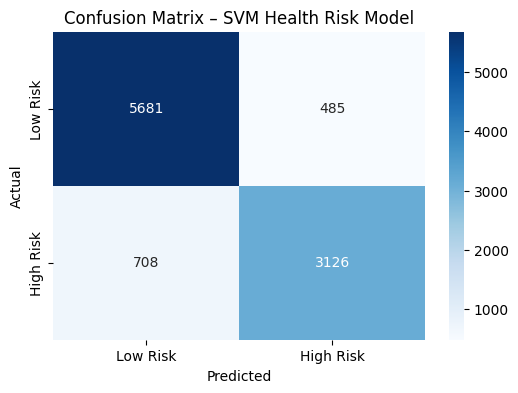

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Low Risk", "High Risk"],
    yticklabels=["Low Risk", "High Risk"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM Health Risk Model")
plt.show()


In [33]:
def predict_health_risk_svm(input_data):
    input_df = pd.DataFrame([input_data])
    pred = svm_model.predict(input_df)[0]
    prob = svm_model.predict_proba(input_df)[0][1]

    return {
        "Predicted_Risk": "High Risk" if pred == 1 else "Low Risk",
        "Risk_Probability (%)": round(prob * 100, 2)
    }


In [34]:
test_patient = {
    "Age": 50,
    "Gender": 1,
    "Systolic_BP": 142,
    "Diastolic_BP": 88,
    "BMI": 30.8,
    "Cholesterol": 240,
    "Glucose": 155,
    "Smoking": 1,
    "Alcohol": 0,
    "Physical_Activity": 2,
    "Family_History": 1
}

predict_health_risk_svm(test_patient)


{'Predicted_Risk': 'High Risk', 'Risk_Probability (%)': 100.0}

In [35]:
joblib.dump(svm_model, "svm_health_risk_model.pkl")

['svm_health_risk_model.pkl']